An easy way to choose where to go is to pick the area with the most navigable pixels available to the rover.
We begin to do this by converting from cartesian coordinates to polar coordinates.

In [2]:
import numpy as np

# Define a function to convert from cartesian to polar coordinates
def to_polar_coords(xpix, ypix):
    # Calculate distance to each pixel
    dist = np.sqrt(xpix**2 + ypix**2)
    # Calculate angle using arctangent function
    angles = np.arctan2(ypix, xpix)
    return dist, angles

Next: Process example image and plot results.

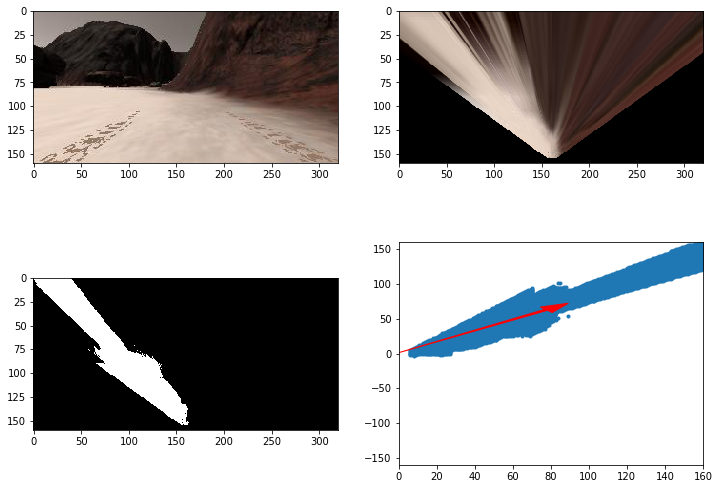

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline
import numpy as np
from extra_functions import perspect_transform, color_thresh, rover_coords


image = mpimg.imread('angle_example.jpg')

dst_size = 5
bottom_offset = 6
src = np.float32([[15, 140], [301 ,140],[200, 96], [118, 96]])
dst = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

warped = perspect_transform(image, src, dst) # Perform perspective transform
colorsel = color_thresh(warped, rgb_thresh=(175, 172, 160)) # Threshold the warped image
xpix, ypix = rover_coords(colorsel)  # Convert to rover-centric coords
distances, angles = to_polar_coords(xpix, ypix) # Convert to polar coords
avg_angle = np.mean(angles) # Compute the average angle

# Do some plotting
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(colorsel, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(avg_angle)
y_arrow = arrow_length * np.sin(avg_angle)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)
plt.show()

Given the approximate field of view of the camera, the average values for angle that you get will vary between about +/- π/4 radians. The input for steering angles you can send to the rover is in degrees over the range -15 (to the right) to +15 (to the left), so the last step is to choose a conversion between your average angle and the steering angle you want to send to the rover. The simplest thing to do would be to convert to degrees and clip to the range +/- 15 like this:

In [20]:
avg_angle_degrees = avg_angle * 180/np.pi
steering = np.clip(avg_angle_degrees, -15, 15)